##### CAUTION: Completing and submitting the assignment constitutes your commitment to complete the assignment independently and not to plagiarize or provide others with the opportunity to plagiarize.

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [25]:
NAME = "郭子涵"
COLLABORATORS = ""

---

### Problem 1: 找零钱 (30 points)
假设有人民币100、50、20、10、5、1、0.5、0.1这些面额，在找零钱时可有多种方案，请用贪心思想，求出找零钱68.90元的方案。（25 points）

In [26]:
def greedy(bills,change):
    # YOUR CODE HERE
    changes=[]
    while change - 0 > 0.001:
        if change >= bills[0]:
            change -= bills[0]
            changes.append(bills[0])
        else:
            bills.pop(0)


def fastChange(bills,change):
    changes=[]
    while change - 0 > 0.001:
        # YOUR CODE HERE
        if change >= bills[0]:
            change -= bills[0]
            changes.append(bills[0])
        else:
            bills.pop(0)
    return changes

In [27]:
# 测试 fastChange函数
bills=[100,50,20,10,5,1,0.5,0.1]
change=68.9
Changes=fastChange(bills,change)
assert Changes == [50,10,5,1,1,1,0.5,0.1,0.1,0.1,0.1] 


fastChange的时间复杂性应为： （n为由最小钱币构成找零的数目）(5 points)

(a)  $\mathit{O} (log\mathit{n} )$

(b)  $\mathit{O} (\mathit{n} )$

(c)  $\mathit{O} (\mathit{n}log\mathit{n} )$

(d)  $\mathit{O} (\mathit{n}^2 )$

##### 请根据你的选择，在下面的代码框中为 ans4 赋值 'a', 'b', 'c', 或 'd' ，例如：
T_n = 'd'

In [28]:
# YOUR CODE HERE
T_n = 'b'

In [29]:
# This test checks that your answer has the right format
# It does not check for correctness
assert T_n in ['a','b','c','d']


### Problem 2: Dijkstra单源点最短路径算法 (30 points)
假设你有一本乐谱，你的朋友们分别有海报、唱片、吉他、架子鼓和钢琴，这些物品间付出一定费用可以交换，交换关系如下图：

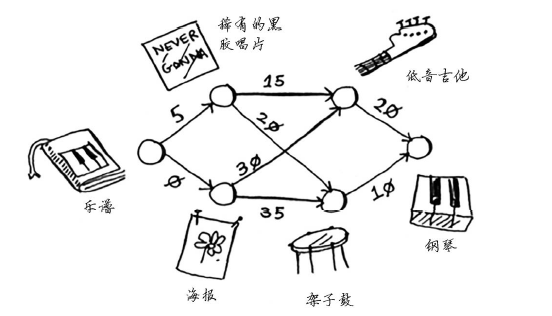

请按课上介绍的框架实现Dijkstra单源点最短路径算法，输出你用乐谱交换其他物品的最小花费。(25 points)

In [30]:
inf=10000
class Node:
    def __init__(self,id,name,weight=inf,next=None ):
        self.id=id
        self.name = name
        self.weight = weight
        self.next = next

class Graph():
    def __init__(self,nameList):
        self.vList=[]
        for i in range(len(nameList)):
            node=Node(i,nameList[i])
            self.vList.append(node)

    def AddEdge(self,startId,endId,weight):
        # YOUR CODE HERE
        edge=Node(endId,self.vList[endId].name,weight)
        edge.next=self.vList[startId].next
        self.vList[startId].next=edge

def greedy(S,g):
    u=0
    min=inf
    for i in range(len(g.vList)):
        # YOUR CODE HERE
        if g.vList[i].weight<min and i not in S:
            min=g.vList[i].weight
            u=i      
    return u

def Dijkstra(g,s):
    g.vList[s].weight=0
    S = set()
    N=len(g.vList)
    prev = [-1] * N
    for i in range(N):
        # YOUR CODE HERE
        u=greedy(S,g)
    return prev

In [31]:
# 测试 Dijkstra函数
graph = Graph(["乐谱","唱片","海报","吉他","架子鼓","钢琴"])
graph.AddEdge(0,2,0)
graph.AddEdge(0,1,5)
graph.AddEdge(1,3,15)
graph.AddEdge(1,4,20)
graph.AddEdge(2,3,30)
graph.AddEdge(2,4,35)
graph.AddEdge(4,5,10)
graph.AddEdge(3,5,20)
prev=Dijkstra(graph,0)
MinCost=[]
for i in range(len(graph.vList)):
    MinCost.append(graph.vList[i].weight)

#将对 MinCost的值进行测试

Dijkstra的时间复杂性应为： (5 points)

(a)  $\Theta (log\mathit{n} )$

(b)  $\Theta (\mathit{n} )$

(c)  $\Theta (\mathit{n}log\mathit{n} )$

(d)  $\Theta (\mathit{n}^2 )$

##### 请根据你的选择，在下面的代码框中为 ans4 赋值 'a', 'b', 'c', 或 'd' ，例如：
T_n = 'd'

In [32]:
# YOUR CODE HERE
T_n = 'd'

In [33]:
# This test checks that your answer has the right format
# It does not check for correctness
assert T_n in ['a','b','c','d']


### Problem 3: 状态转移问题 (40 points)
用宽度优先搜索的思路求解下图所示的状态转移问题，目标是将6号人移动到6号位，请设计并实现算法，输出完整的状态转移路径。（40 points）

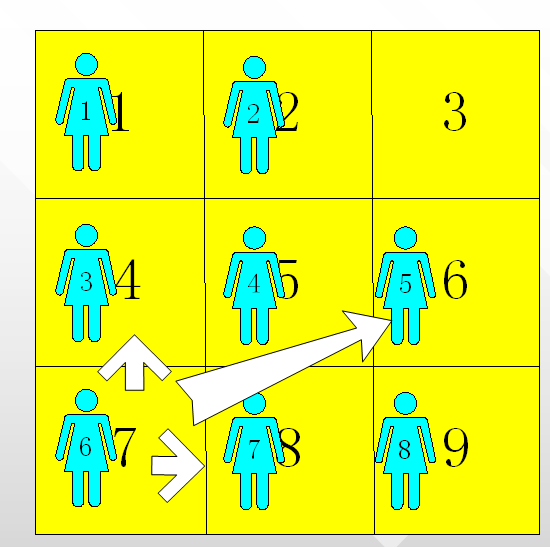

In [34]:
import queue
import copy

class Status:
    position = [[0] * 3 for i in range(3)]
    parent = None
    r_i = -1
    r_j = -1

def findRoom(v):
    return v.r_i, v.r_j
    #for i in range(3):
        #for j in range(3):
            #if v.position[i][j]==0:
                #return i,j

def hashing(t):
    y = 0
    for i in range(3):
        for j in range(3):
            y = y * 10 + t[i][j]
    return y

def getUnreachedChild(v):
    y = []
    r_i, r_j = findRoom(v)
    if r_i > 0:   
        u = copy.deepcopy(v)
        u.position[r_i][r_j], u.position[r_i-1][r_j] = u.position[r_i-1][r_j], u.position[r_i][r_j]
        h = hashing(u.position)
        if h not in reached:
            u.parent = v
            y.append(u)
    if r_i < 2:    
        u = copy.deepcopy(v)
        u.position[r_i][r_j], u.position[r_i+1][r_j] = u.position[r_i+1][r_j], u.position[r_i][r_j]
        h = hashing(u.position)
        if h not in reached:
            u.parent = v
            y.append(u)
    if r_j > 0:    
        u = copy.deepcopy(v)
        u.position[r_i][r_j], u.position[r_i][r_j-1] = u.position[r_i][r_j-1], u.position[r_i][r_j]
        h = hashing(u.position)
        if h not in reached:
            u.parent = v
            y.append(u)
    if r_j < 2:    
        u = copy.deepcopy(v)
        u.position[r_i][r_j], u.position[r_i][r_j+1] = u.position[r_i][r_j+1], u.position[r_i][r_j]
        h = hashing(u.position)
        if h not in reached:
            u.parent = v
            y.append(u)        
    return y

def isReachDest(u):
    if u[di][dj] == dp:
        return True
    else:
        return False

def tracking(end):
    track=[] 
    while not end == None:
        track.append(end.position)
        end = end.parent
    return track


In [35]:
# 测试
s = Status()
s.position = [[1, 2, 0], [3, 4, 5], [6, 7, 8]]
s.r_i = 0
s.r_j = 2
di, dj, dp = 1, 2, 6
reached = {}  #reached=[]
Q = queue.Queue()
Q.put(s)
reached[hashing(s.position)] = True  #reached.append(s.position)
bfn = 0
Reach=False
while not Q.empty():
    v = Q.get()
    bfn = bfn + 1
    y = getUnreachedChild(v)
    for i in range(len(y)):
        Q.put(y[i])
        reached[hashing(
            y[i].position)] = True  #reached.append(y[i].position)
        Reach=isReachDest(y[i].position)
        if Reach:
            track = tracking(y[i])
            break
    if Reach:
        break

#将对 bfn和 track的值进行测试